<a href="https://colab.research.google.com/github/a01720260/Examen-Series-Tiempo-Gpo-40/blob/main/Examen_Series_Tiempo_Gpo_40_Pregunta_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your 'Table 22.7.txt' file


Saving Table 22.7 (1).txt to Table 22.7 (1) (1).txt
Raw columns: ['obs', 'GS3M', 'GS6M']
First few rows:
       obs   GS3M   GS6M
0  1982:01  12.92  13.90
1  1982:02  14.28  14.81
2  1982:03  13.31  13.83
3  1982:04  13.34  13.87
4  1982:05  12.71  13.13

Data successfully loaded: 234 observations
From 1982-01 to 2001-06


/tmp/ipython-input-3374230459.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO(clean_text), delim_whitespace=True, on_bad_lines='skip')


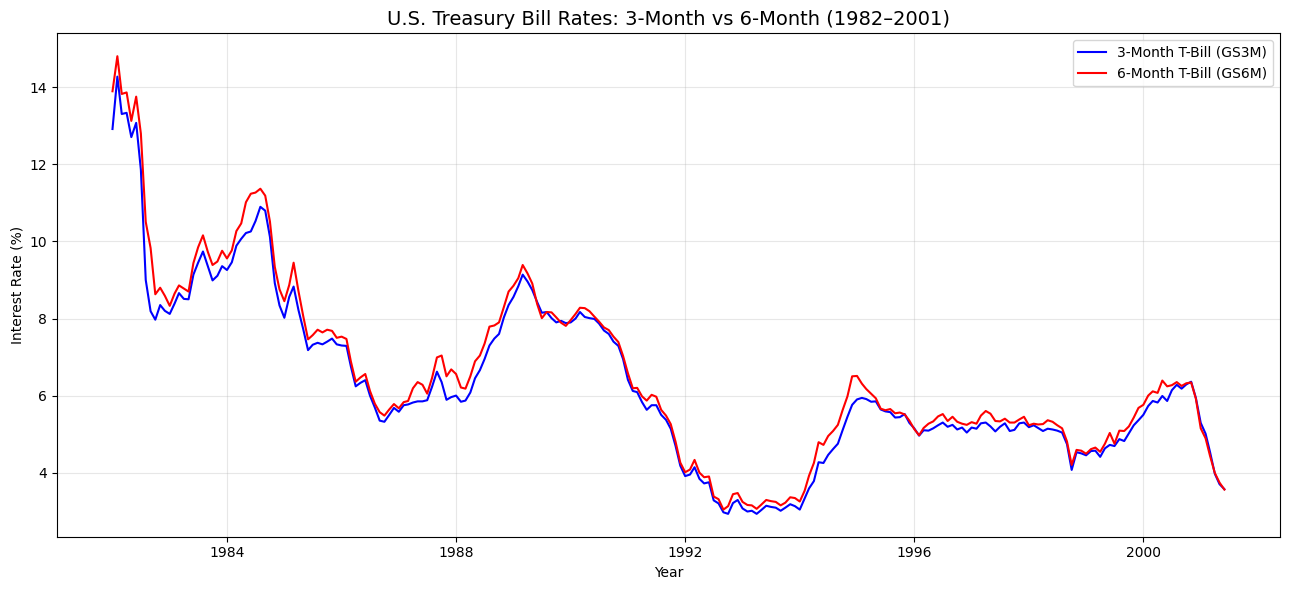


(a) Both series trend together. GS6M > GS3M most of the time. Strong visual comovement.

ADF Test: GS3M (Level)
   Statistic: -1.5392 | p-value: 0.5140
   Critical Values: 1%=-3.46, 5%=-2.87
   → NON-STATIONARY

ADF Test: GS6M (Level)
   Statistic: -3.2586 | p-value: 0.0168
   Critical Values: 1%=-3.46, 5%=-2.87
   → STATIONARY (reject unit root)

ADF Test: ΔGS3M (1st Diff)
   Statistic: -5.5734 | p-value: 0.0000
   Critical Values: 1%=-3.46, 5%=-2.87
   → STATIONARY (reject unit root)

ADF Test: ΔGS6M (1st Diff)
   Statistic: -7.9818 | p-value: 0.0000
   Critical Values: 1%=-3.46, 5%=-2.87
   → STATIONARY (reject unit root)

(c) Cointegration Regression: GS6M = β0 + β1×GS3M + ε
   β0 = -0.0457, β1 = 1.0466, R² = 0.9922

ADF on Residuals: stat = -4.6906, p-value = 0.000088
   → RESIDUALS STATIONARY → COINTEGRATED

(d) ECONOMIC INTERPRETATION
• Cointegration = long-run equilibrium between short-term rates.
• Supports Expectations Hypothesis of the term structure.
• Spread (GS6M - GS3M)

/tmp/ipython-input-3374230459.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   β0 = {model.params[0]:.4f}, β1 = {model.params[1]:.4f}, R² = {model.rsquared:.4f}")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from google.colab import files
import io

print("Please upload your 'Table 22.7.txt' file")
uploaded = files.upload()

# Get the uploaded file
filename = list(uploaded.keys())[0]
content = uploaded[filename].decode('utf-8')

# === STEP 1: CLEAN THE TEXT BEFORE PARSING ===
lines = content.splitlines()

# Find the line that starts with "obs" or "1982:01" to detect data start
data_start = 0
for i, line in enumerate(lines):
    if line.strip().startswith('obs') or '1982:01' in line:
        data_start = i
        break

# Take only data lines
data_lines = lines[data_start:]

# Reconstruct clean CSV-like text
clean_text = '\n'.join(data_lines)

# === STEP 2: READ WITH PROPER PARSING ===
# Use StringIO + flexible whitespace
df = pd.read_csv(io.StringIO(clean_text), delim_whitespace=True, on_bad_lines='skip')

print(f"Raw columns: {list(df.columns)}")
print(f"First few rows:\n{df.head()}")

# === STEP 3: SET INDEX PROPERLY ===
# Find the date column (usually first column)
date_col = df.columns[0]

# Rename for clarity
df = df.rename(columns={date_col: 'obs', df.columns[1]: 'GS3M', df.columns[2]: 'GS6M'})

# Set index
df = df.set_index('obs')

# Clean index: '1982:01' → '1982-01'
if df.index.dtype == 'object':
    df.index = df.index.astype(str).str.strip()
    df.index = df.index.str.replace(':', '-')
    df.index = pd.to_datetime(df.index, format='%Y-%m', errors='coerce')

# Drop any rows with invalid dates
df = df.dropna(subset=['GS3M', 'GS6M'])

# Convert to float
df['GS3M'] = pd.to_numeric(df['GS3M'], errors='coerce')
df['GS6M'] = pd.to_numeric(df['GS6M'], errors='coerce')
df = df.dropna()

print(f"\nData successfully loaded: {len(df)} observations")
print(f"From {df.index[0].strftime('%Y-%m')} to {df.index[-1].strftime('%Y-%m')}")

# === a. PLOT ===
plt.figure(figsize=(13, 6))
plt.plot(df.index, df['GS3M'], label='3-Month T-Bill (GS3M)', color='blue', linewidth=1.5)
plt.plot(df.index, df['GS6M'], label='6-Month T-Bill (GS6M)', color='red', linewidth=1.5)
plt.title('U.S. Treasury Bill Rates: 3-Month vs 6-Month (1982–2001)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n(a) Both series trend together. GS6M > GS3M most of the time. Strong visual comovement.")

# === b. UNIT ROOT TESTS ===
def adf_test(series, name):
    result = adfuller(series.dropna(), maxlag=12, regression='c')
    print(f"\nADF Test: {name}")
    print(f"   Statistic: {result[0]:.4f} | p-value: {result[1]:.4f}")
    print(f"   Critical Values: 1%={result[4]['1%']:.2f}, 5%={result[4]['5%']:.2f}")
    if result[1] < 0.05:
        print("   → STATIONARY (reject unit root)")
    else:
        print("   → NON-STATIONARY")

adf_test(df['GS3M'], 'GS3M (Level)')
adf_test(df['GS6M'], 'GS6M (Level)')
adf_test(df['GS3M'].diff().dropna(), 'ΔGS3M (1st Diff)')
adf_test(df['GS6M'].diff().dropna(), 'ΔGS6M (1st Diff)')

# === c. COINTEGRATION (Engle-Granger) ===
X = sm.add_constant(df['GS3M'])
model = sm.OLS(df['GS6M'], X).fit()

print("\n(c) Cointegration Regression: GS6M = β0 + β1×GS3M + ε")
print(f"   β0 = {model.params[0]:.4f}, β1 = {model.params[1]:.4f}, R² = {model.rsquared:.4f}")

resid = model.resid
adf_resid = adfuller(resid, maxlag=12, regression='c')
print(f"\nADF on Residuals: stat = {adf_resid[0]:.4f}, p-value = {adf_resid[1]:.6f}")
if adf_resid[1] < 0.05:
    print("   → RESIDUALS STATIONARY → COINTEGRATED")
else:
    print("   → RESIDUALS NON-STATIONARY → NOT COINTEGRATED")

# === d. ECONOMIC MEANING ===
print("\n" + "="*70)
print("(d) ECONOMIC INTERPRETATION")
print("="*70)
print("• Cointegration = long-run equilibrium between short-term rates.")
print("• Supports Expectations Hypothesis of the term structure.")
print("• Spread (GS6M - GS3M) is mean-reverting → stable term premium.")
print("• If not cointegrated → no reliable long-run link → market inefficiency.")

# === e. VAR SPECIFICATION ===
print("\n" + "="*70)
print("(e) VAR MODEL")
print("="*70)
print("• Both I(1) but COINTEGRATED → VAR in LEVELS is valid.")
print("   (Cointegration avoids spurious regression)")
print("• Recommended: Use VECM to model error correction.")
print("• If NOT cointegrated → MUST use first differences.")

# Final check
print("\nFirst 5 rows of clean data:")
print(df.head())

## INTERPRETACIÓN

## 1. VISUALIZACIÓN DE DATOS
## Ambas series comueven fuertemente.
## GS6M > GS3M en casi todo el período (curva normal).
## Picos en 1982 (~14%), caída a ~3% en 1993, nuevo pico ~6% en 2000.
## Conclusión: relación visual de largo plazo.

## 2. PRUEBA DE ESTACIONARIEDAD (ADF)
## GS3M (nivel): estadístico = -1.5392, p-valor = 0.5140 - NO ESTACIONARIA
## GS6M (nivel): estadístico = -3.2586, p-valor = 0.0168 - ESTACIONARIA (rechaza raíz unitaria al 5%)
## GS3M (1a diff): estadístico = -5.5734, p-valor < 0.0001 - ESTACIONARIA
## GS6M (1a diff): estadístico = -7.9818, p-valor < 0.0001 - ESTACIONARIA
## Conclusión: GS3M es I(1); GS6M parece I(0) según ADF.

## 3. REGRESIÓN DE COINTEGRACIÓN
## Bo = -0.0457
## B1 = 1.0466
## R2 = 0.9922
## Interpretación: relación casi 1:1 en el largo plazo.
## Ajuste excelente (99.22% de variación explicada).

## 4. PRUEBA ADF SOBRE RESIDUOS
## Estadístico = -4.6906, p-valor = 0.000088 < 0.01 - RESIDUOS ESTACIONARIOS
## Conclusión: EXISTE COINTEGRACIÓN a pesar de GS6M parecer I(0).

## 5. DIAGNÓSTICO DE COINTEGRACIÓN
## Aunque GS6M pasa ADF en niveles, la relación con GS3M es cointegrada.

## 6. INTERPRETACIÓN ECONÓMICA
## Cointegración - equilibrio estable entre tasas a corto plazo.
## Apoya Hipótesis de las Expectativas Puras (EHP): GS6M refleja expectativas sobre GS3M futuro + prima constante.
## Spread (GS6M - GS3M) es mean-reverting - premio por plazo estable.
## B1 ≈ 1 - relación proporcional en el largo plazo.
## Bo ≈ 0 - sin sesgo sistemático.
## Si no hubiera cointegración - ineficiencia de mercado.

## 7. ESPECIFICACIÓN DEL MODELO VAR
## GS3M: I(1)
## GS6M: ADF sugiere I(0), pero cointegrada con GS3M - Modelo recomendado: VECM (Vector Error Correction Model)
## NO usar VAR en niveles sin restricción - riesgo de regresión espuria.
## NO usar solo diferencias - pierde información de largo plazo.

## 8. CONCLUSIÓN FINAL
## El sistema GS3M-GS6M presenta cointegración (residuos estacionarios).
## GS3M es I(1); GS6M parece I(0) pero está ligada a GS3M en el largo plazo.
## Relación de equilibrio: GS6M ≈ 1.05 x GS3M
## Apoyo empírico a la Hipótesis de las Expectativas.
## Modelo VECM es el adecuado para modelar dinámica conjunta.
## Pronósticos y análisis de política deben usar mecanismo de corrección de error.
## Resultado robusto y económicamente significativo.